In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
desired_width = 320
pd.set_option("display.width", desired_width)
pd.set_option("display.precision", 2)
df = pd.read_csv("World Crime Index .csv")

In [15]:
df

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29
...,...,...,...,...
448,449,"Quebec City, Canada",15.14,84.86
449,450,"Taipei, Taiwan",15.05,84.95
450,451,"San Sebastian, Spain",14.86,85.14
451,452,"Doha, Qatar",13.96,86.04


In [4]:
#no dataframe acima temos informações acerca do indice de climinalidade e segurança de varias cidades ao redor do mundo.
#logo de cara vemos que na coluna cidade ou 'city' tem não apenas o nome da cidade, mas o pais, vamos criar uma nova apenas com 
#o pais e tentaremos criar um grafico de qual pais tem uma seguranca melhor

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          453 non-null    int64  
 1   City          453 non-null    object 
 2   Crime Index   453 non-null    float64
 3   Safety Index  453 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.3+ KB


In [ ]:
#com a função info conseguimos extrair as informações relativas a cada coluna

In [17]:
df['Pais'] = df['City'].apply(lambda x: x.split(',')[-1])

In [20]:
df

,Rank,City,Crime Index,Safety Index,Pais
0,1,"Caracas, Venezuela",83.98,16.02,Venezuela
1,2,"Pretoria, South Africa",81.98,18.02,South Africa
2,3,"Celaya, Mexico",81.80,18.20,Mexico
3,4,"San Pedro Sula, Honduras",80.87,19.13,Honduras
4,5,"Port Moresby, Papua New Guinea",80.71,19.29,Papua New Guinea
...,...,...,...,...,...
448,449,"Quebec City, Canada",15.14,84.86,Canada
449,450,"Taipei, Taiwan",15.05,84.95,Taiwan
450,451,"San Sebastian, Spain",14.86,85.14,Spain
451,452,"Doha, Qatar",13.96,86.04,Qatar


In [9]:
#acima usamos a função apply com uma função lambda que pega a palavra depois da virgula e coloca em uma nova coluna "pais"

In [10]:
#como ja temos o pais em cada linha, vamos tentar remover o nome pais usando a mesma função

In [21]:
df['City'] = df['City'].apply(lambda x: x.split(',')[-2])

In [26]:
df

,Rank,City,Crime Index,Safety Index,Pais
0,1,Caracas,83.98,16.02,Venezuela
1,2,Pretoria,81.98,18.02,South Africa
2,3,Celaya,81.80,18.20,Mexico
3,4,San Pedro Sula,80.87,19.13,Honduras
4,5,Port Moresby,80.71,19.29,Papua New Guinea
...,...,...,...,...,...
448,449,Quebec City,15.14,84.86,Canada
449,450,Taipei,15.05,84.95,Taiwan
450,451,San Sebastian,14.86,85.14,Spain
451,452,Doha,13.96,86.04,Qatar


In [35]:
#vamos agora agrupar por pais

In [41]:
df.groupby('Pais')['City'].count().sort_values(ascending=False)

Pais
 United States     58
 Canada            38
 India             25
 United Kingdom    18
 Australia         16
                   ..
 Jamaica            1
 Iraq               1
 Iran               1
 Iceland            1
 Zimbabwe           1
Name: City, Length: 118, dtype: int64

In [ ]:
#temos a informação de quantas cidades por pais há no dataframe

In [47]:
df.groupby('Pais')['Safety Index'].sum().sort_values(ascending=False)

Pais
 United States          2824.20
 Canada                 2127.50
 India                  1416.19
 United Kingdom          962.05
 Germany                 947.13
                         ...   
 Trinidad And Tobago      23.79
 Afghanistan              20.61
 Papua New Guinea         19.29
 Honduras                 19.13
 Venezuela                16.02
Name: Safety Index, Length: 118, dtype: float64

In [48]:
#acima temos as informações de somatorio dos indices de segurança de cada pais

In [49]:
df.groupby('Pais')['Crime Index'].sum().sort_values(ascending=False)

Pais
 United States     2975.80
 Canada            1672.50
 India             1083.81
 Brazil             877.64
 United Kingdom     837.95
                    ...   
 Slovenia            21.48
 Bahrain             21.06
 Oman                20.54
 Taiwan              15.05
 Qatar               13.96
Name: Crime Index, Length: 118, dtype: float64

In [50]:
#acima estão os pais com o somatorio do indice de crime de suas cidades

In [51]:
#para fazer uma analise mais profunda podemos subtrair um indice pelo outro


In [111]:
(df.groupby('Pais')['Safety Index'].sum() - df.groupby('Pais')['Crime Index'].sum()).sort_values(ascending=False)

Pais
 Canada           455.00
 Germany          394.26
 Switzerland      346.12
 India            332.38
 Spain            308.76
                   ...  
 France           -93.76
 Argentina        -97.64
 United States   -151.60
 South Africa    -328.04
 Brazil          -455.28
Length: 118, dtype: float64

In [54]:
#vamos criar dois graficos com os 30 paises com maiores indicies de cada indice

In [110]:
df.groupby('Pais')['Safety Index'].sum().sort_values(ascending=False).head(30)

Pais
 Qatar                   86.04
 United Arab Emirates    85.17
 Taiwan                  84.95
 Oman                    79.46
 Bahrain                 78.94
 Switzerland             78.84
 Slovenia                78.52
 Hong Kong               78.38
 Armenia                 78.34
 Estonia                 77.85
 Iceland                 76.98
 Rwanda                  75.84
 Denmark                 75.73
 Czech Republic          74.91
 Georgia                 74.84
 South Korea             74.62
 Croatia                 73.86
 Austria                 72.89
 Singapore               72.78
 Netherlands             72.77
 Finland                 72.24
 Japan                   71.93
 Saudi Arabia            71.48
 Norway                  70.39
 Slovakia                70.11
 Israel                  70.09
 Luxembourg              69.85
 Azerbaijan              69.64
 Kuwait                  69.45
 Cyprus                  69.04
Name: Safety Index, dtype: float64

In [105]:
df_safety = pd.DataFrame(df.groupby('Pais')['Safety Index'].sum().sort_values(ascending=False).head(30))

In [106]:
df_safety.reset_index(inplace=True)

In [107]:
df_safety

,Pais,Safety Index
0,United States,2824.20
1,Canada,2127.50
2,India,1416.19
3,United Kingdom,962.05
4,Germany,947.13
5,Australia,859.62
6,Italy,634.66
7,Mexico,621.85
8,Spain,604.38
9,France,553.12


In [108]:
#criamos acima um novo dataframe com os 30 paises mais seguros

In [112]:
#porem não há muitas informações ai por conta que é um somatorio de indices, mas nem todos tem o mesmo numero de cidades 
#contabilizadas. Vamos criar um novo dataframe que tenha a media de cada pais

In [117]:
(df.groupby('Pais')['Safety Index'].mean() - df.groupby('Pais')['Crime Index'].mean()).sort_values(ascending=False)

Pais
 Qatar                   72.08
 United Arab Emirates    70.35
 Taiwan                  69.90
 Oman                    58.92
 Bahrain                 57.88
                         ...  
 South Africa           -54.67
 Afghanistan            -58.78
 Papua New Guinea       -61.42
 Honduras               -61.74
 Venezuela              -67.96
Length: 118, dtype: float64

In [118]:
#agora temos informações mais claras de cada pais como um indice subtraindo o de segurança pelo o de crime

In [145]:
df_mean_all = pd.DataFrame({"Mean" : (df.groupby('Pais')['Safety Index'].mean() - df.groupby('Pais')['Crime Index'].mean()).sort_values(ascending=False)})

In [147]:
df_mean_all.reset_index(inplace=True)

In [148]:
df_mean_all

,Pais,Mean
0,Qatar,72.08
1,United Arab Emirates,70.35
2,Taiwan,69.90
3,Oman,58.92
4,Bahrain,57.88
...,...,...
113,South Africa,-54.67
114,Afghanistan,-58.78
115,Papua New Guinea,-61.42
116,Honduras,-61.74


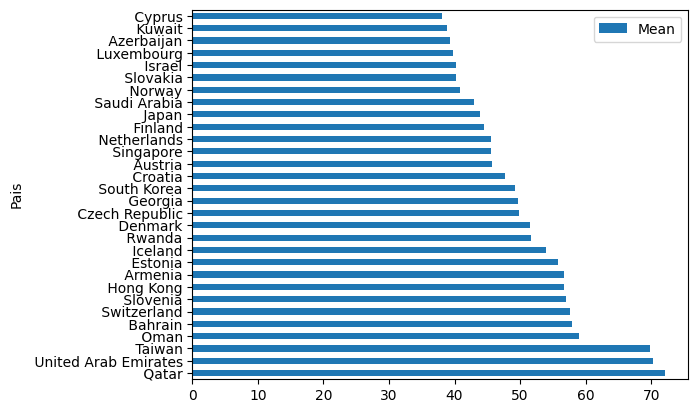

In [167]:
df_mean_all.head(30).plot(x='Pais', y=['Mean'], kind='barh')
plt.show()

In [163]:
#acima temos os trinta paises mais seguros do dataframe, para fazer dois menos seguros basta usar tail no lugar de head

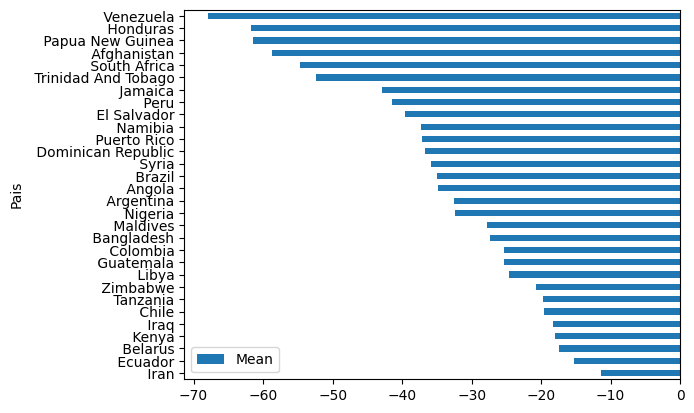

In [168]:
df_mean_all.tail(30).plot(x='Pais', y=['Mean'], kind='barh')
plt.show()